# Df 0 1 7_Vec Ops H E P
This tutorial shows how VecOps can be used to slim down the programming
model typically adopted in HEP for analysis.



**Author:** Danilo Piparo, Andre Vieira Silva  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer (Beta)</a> from the macro found in the ROOT repository  on Wednesday, July 18, 2018 at 03:44 AM.</small></i>

In [1]:
import ROOT
from math import sqrt

filename = ROOT.gROOT.GetTutorialDir().Data() + "/dataframe/df017_vecOpsHEP.root"
treename = "myDataset"
RDF = ROOT.ROOT.RDataFrame

def WithPyROOT():
    f = ROOT.TFile(filename)
    h = ROOT.TH1F("pt", "pt", 16, 0, 4)
    for event in f.myDataset:
        for E, px, py in zip(event.E, event.px, event.py):
            if (E > 100):
               h.Fill(sqrt(px*px + py*py))
    h.DrawCopy()

def WithRDataFrameVecOpsJit():
    f = RDF(treename, filename)
    h = f.Define("good_pt", "sqrt(px*px + py*py)[E>100]")\
         .Histo1D(("pt", "pt", 16, 0, 4), "good_pt")
    h.DrawCopy()

Welcome to JupyROOT 6.15/01


 We plot twice the same quantity, the key is to look into the implementation
 of the functions above

In [2]:
c = ROOT.TCanvas()
c.Divide(2,1)
c.cd(1)
WithPyROOT()
c.cd(2)
WithRDataFrameVecOpsJit()

Draw all canvases 

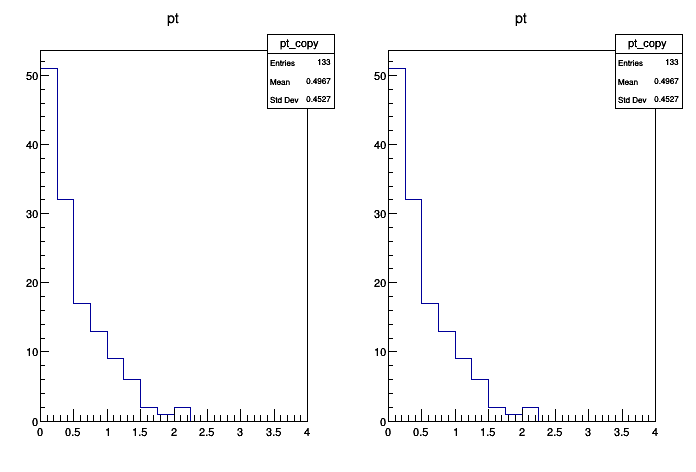

In [3]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()